In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
benign_test=glob.glob('melanoma_cancer_dataset/test/benign/*.jpg')
malignant_test=glob.glob('melanoma_cancer_dataset/test/malignant/*.jpg')

In [4]:
benign_train=glob.glob('melanoma_cancer_dataset/train/benign/*.jpg')
malignant_train=glob.glob('melanoma_cancer_dataset/train/malignant/*.jpg')

In [5]:
print('number of images of all classes in test set')
print('images in beingn test:',len(benign_test))
print('images in malignant_test:',len(malignant_test))
print('number of images of all classes in train set')
print('images in beingn train:',len(benign_train))
print('images in malignant_train:',len(malignant_train))

number of images of all classes in test set
images in beingn test: 250
images in malignant_test: 250
number of images of all classes in train set
images in beingn train: 1005
images in malignant_train: 996


In [6]:
image_train=[]
label_train=[]
for i in benign_train:
    img=plt.imread(i)
    image_train.append(img)
    label_train.append(0)
for i in malignant_train:
    img=plt.imread(i)
    image_train.append(img)
    label_train.append(1)
    

In [7]:
image_test=[]
label_test=[]
for i in benign_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(0)
for i in malignant_test:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(1)
    

In [8]:
image_train,label_train=shuffle(image_train,label_train,random_state=100)


In [9]:
image_test,label_test=shuffle(image_test,label_test,random_state=100)

In [10]:
label_dict={0:'beingn',1:'malignant'}

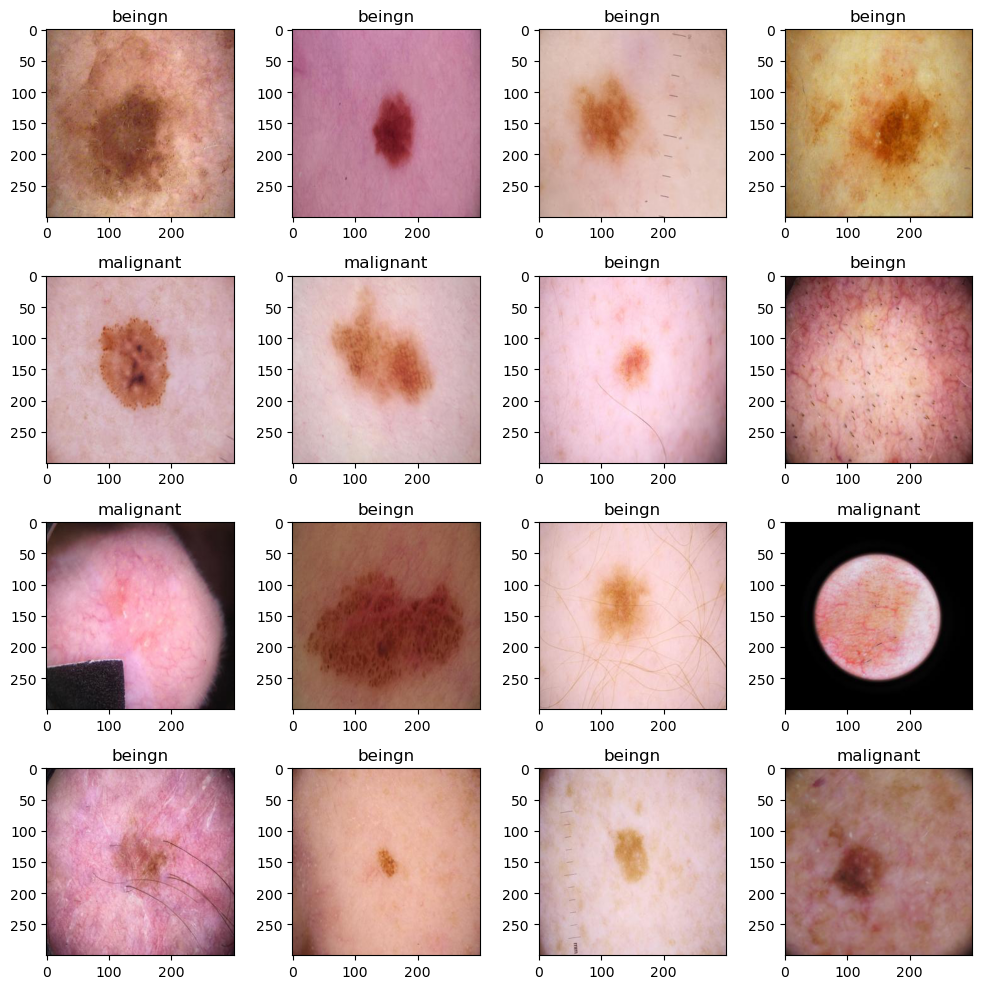

In [11]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image_train[i])
    plt.title(label_dict[label_train[i]])
plt.tight_layout()

In [12]:
for i in range(10):
    print(image_test[i].shape)

(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)


In [13]:
x_train=[]
for i in image_train:
    x_train.append(resize(i,(224,224,3)))

In [14]:
x_test=[]
for i in image_test:
    x_test.append(resize(i,(224,224,3)))

In [15]:
x_train=np.array(x_train)
x_test=np.array(x_test)

In [16]:
for i in range(10):
    print(x_test[i].shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [17]:
y_train=np.array(label_train)
y_test=np.array(label_test)

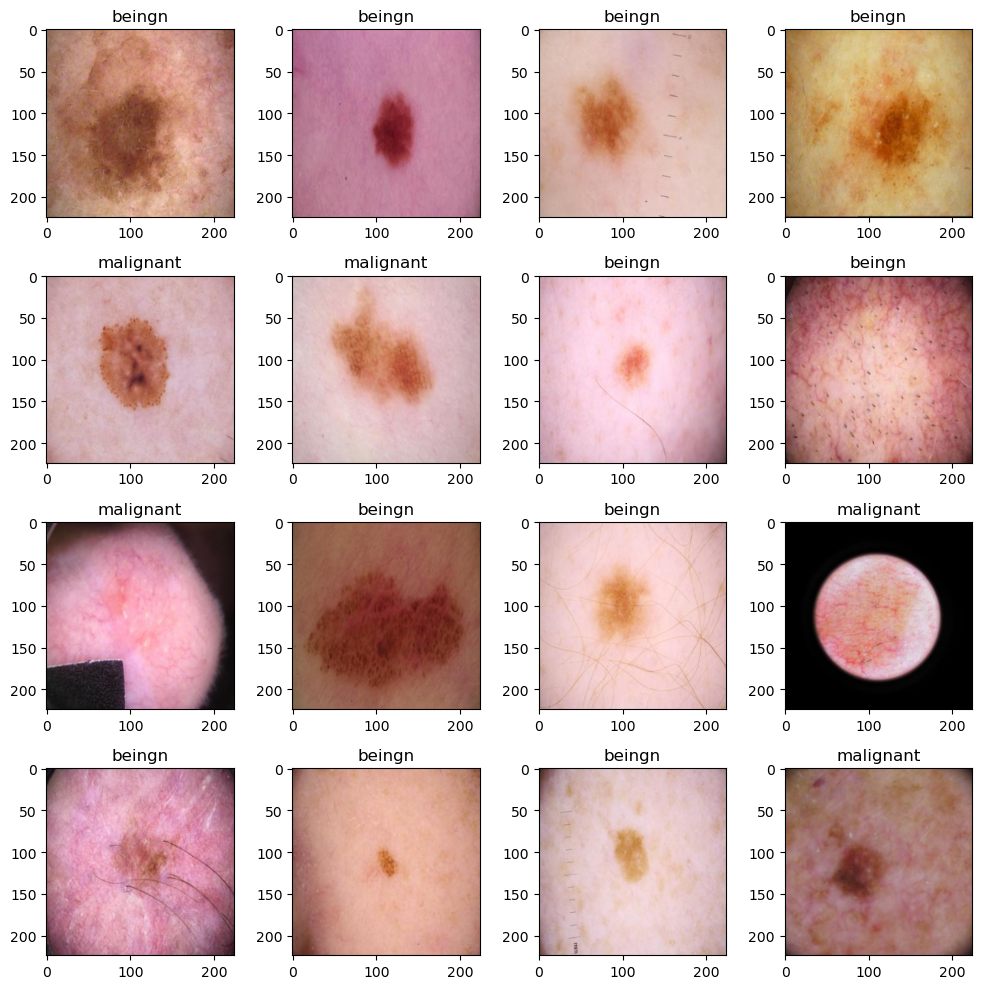

In [18]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    plt.title(label_dict[y_train[i]])
plt.tight_layout()

In [19]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(500, 224, 224, 3)
(2001, 224, 224, 3)
(500,)
(2001,)


In [20]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/classification/2" 
model = tf.keras.Sequential([
    hub.KerasLayer(model_url,input_shape=(224,224,3),trainable=False),layers.Dense(2,activation='softmax')
])

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              4694024   
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 4696026 (17.91 MB)
Trainable params: 2002 (7.82 KB)
Non-trainable params: 4694024 (17.91 MB)
_________________________________________________________________


In [23]:
model.fit(x_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
60/60 [==============================] - 110s 2s/step - loss: 0.3947 - accuracy: 0.8474 - val_loss: 0.2960 - val_accuracy: 0.9208
Epoch 2/10
60/60 [==============================] - 98s 2s/step - loss: 0.2195 - accuracy: 0.9200 - val_loss: 0.2431 - val_accuracy: 0.9307
Epoch 3/10
60/60 [==============================] - 103s 2s/step - loss: 0.1890 - accuracy: 0.9289 - val_loss: 0.2446 - val_accuracy: 0.9109
Epoch 4/10
60/60 [==============================] - 101s 2s/step - loss: 0.1728 - accuracy: 0.9416 - val_loss: 0.2146 - val_accuracy: 0.9208
Epoch 5/10
60/60 [==============================] - 100s 2s/step - loss: 0.1624 - accuracy: 0.9411 - val_loss: 0.2267 - val_accuracy: 0.9208
Epoch 6/10
60/60 [==============================] - 102s 2s/step - loss: 0.1588 - accuracy: 0.9442 - val_loss: 0.2165 - val_accuracy: 0.9109
Epoch 7/10
60/60 [==============================] - 105s 2s/step - loss: 0.1471 - accuracy: 0.9437 - val_loss: 0.2414 - val_accuracy: 0.9109
Epoch 8/10
60/

In [24]:
model.evaluate(x_train,y_train)

63/63 [==============================] - 105s 2s/step - loss: 0.1216 - accuracy: 0.9595


[0.12157948315143585, 0.9595202207565308]

In [25]:
y_pred=model.predict(x_test)

16/16 [==============================] - 29s 2s/step


In [26]:
y_pred=[np.argmax(i) for i in y_pred]

In [27]:
accuracy_score(y_test,y_pred)

0.906

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       250
           1       0.96      0.85      0.90       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



<Axes: >

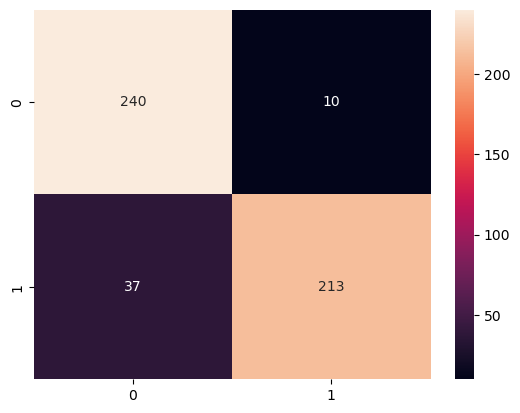

In [29]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')